<a href="https://colab.research.google.com/github/ia4226/Neuro-Fuzzy-casestudy/blob/main/RandomForest(SCADA).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing the dependencies

In [1]:
import pandas as pd

Data definition (no csv file available)

In [2]:
data = {
    'windspeed': [6.9, 5.3, 5.0, 4.4, 5.7, 3.9, 3.9, 4.2, 4.1, 4.8],
    'rotation': [0.00, 0.00, 0.00, 0.00, 0.00, 6.75, 6.64, 7.18, 7.02, 8.39],
    'power': [0.00, 0.00, 0.00, 0.00, 0.00, 6.01, 6.33, 6.22, 6.20, 7.14],
    'main_carrier_temp': [0, 0, 0, 0, 0, 147, 128, 163, 160, 284],
    'ambient_temp': [13, 13, 13, 13, 13, 16, 15, 15, 15, 15],
    'tower_temp': [12, 12, 12, 12, 12, 9, 9, 9, 9, 9],
    'control_cabinet_temp': [14, 14, 14, 14, 14, 17, 17, 18, 17, 17],
    'transformer_temp': [24, 24, 24, 24, 23, 27, 27, 27, 27, 27],
    'yaw_inverter_cabinet_temp': [34, 34, 34, 34, 34, 35, 35, 34, 34, 34]
}

Data frame creation

In [3]:
df = pd.DataFrame(data)

Split data

In [4]:
X = df.drop(columns=['power'])  # Features (excluding the 'power' column)
y = df['power']  # Target variable

Training and Testing Sets

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Model Training

In [8]:
from sklearn.ensemble import RandomForestRegressor

Initialize

In [9]:
rf_model = RandomForestRegressor(random_state=42)

In [10]:
# Train the model
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

Model Evaluation

In [11]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

Prediction

In [12]:
y_pred = rf_model.predict(X_test)

Evaluate the model

In [13]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5

In [14]:
print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)

Mean Absolute Error: 0.07270000000000307
Mean Squared Error: 0.007958180000000129
Root Mean Squared Error: 0.08920863186934395


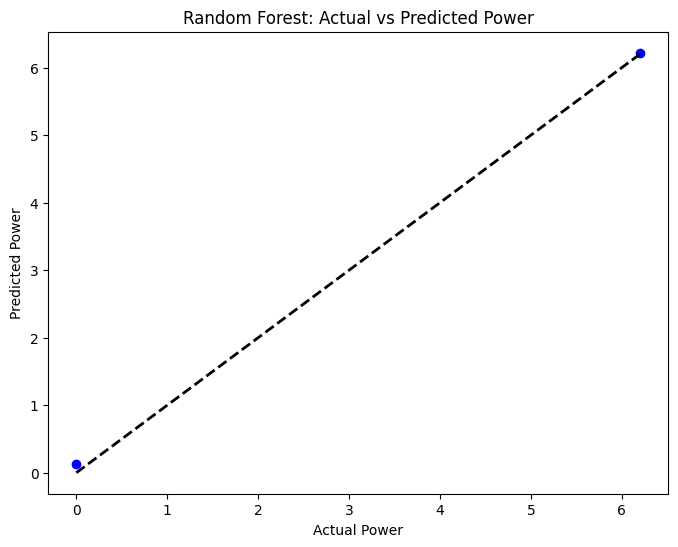

In [15]:
import matplotlib.pyplot as plt

# Plotting actual vs predicted values for Random Forest
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'k--', lw=2)
plt.xlabel('Actual Power')
plt.ylabel('Predicted Power')
plt.title('Random Forest: Actual vs Predicted Power')
plt.show()